<a href="https://colab.research.google.com/github/KathyRoma/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3205, 2689])

In [83]:
# I calculate mean
sales_mean = sales.sum()/len(sales)
sales_mean

3046.285714285714

In [82]:
# Check that with a library function
np.mean(sales)

3046.285714285714

In [16]:
sales_var = sum([(sale - sales_mean)**2 for sale in sales]) / (len(sales) -1)
sales_var

211717.90476190476

In [17]:
np.var(sales, ddof=1)

211717.90476190476

In [0]:
import math


In [19]:
numerator = 0
for sale in sales:
  sums = sum(np.power([sale - sales_mean],2))
  numerator = sums + numerator  

st_dev = math.sqrt(numerator / len(sales))
st_dev


425.9958800222349

In [20]:
np.std(sales)

425.9958800222349

In [21]:
np.var(sales)**0.5

425.9958800222349

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [25]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])
Covariance = np.cov(sales, customers, bias=True)[0][1]
Covariance

6450.9795918367345

In [86]:
df = pd.DataFrame({'customers': customers, 'sales': sales})
df

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3205
6,93,2689


In [87]:
df['sales'].var()

211717.90476190476

In [88]:
df.cov()

,customers,sales
customers,290.952381,7526.142857
sales,7526.142857,211717.904762


In [89]:
df.corr()
# Our two columns are highly correlated

,customers,sales
customers,1.000000,0.958921
sales,0.958921,1.000000


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def mean(data, ddof=0):
  data = np.array(data)
  return sum(data)/(len(data)-ddof)

In [92]:
# I wrote that formula before, now I use it in a function, half-hardcoding
def variance(data):
  data = np.array(data)
  variance = mean((data - mean(data))**2, ddof=1)
  return variance

variance(df['sales'])
# Perfect, I've seen this numberf before

211717.90476190476

In [97]:
# The function for standard deviation 
def std_dev(data):
  data = np.array(data)
  std = np.sqrt(variance(data))
  return std

print(std_dev(sales))
std_dev(df['sales'])

460.12813950236165


460.12813950236165

In [98]:
print(std_dev(customers))
std_dev(df['customers'])
#Beautiful!

17.057326313123664


17.057326313123664

In [27]:
import scipy
from scipy import stats
scipy.stats.pearsonr(sales, customers)

(0.9589207273874911, 0.0006425185878509078)

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [30]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
df = df.drop(['Unnamed: 0'], axis=1)


In [0]:
df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [32]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [43]:
df['cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F33                4
                  ..
C45                1
E63                1
B94                1
A23                1
A9                 1
Name: cabin, Length: 186, dtype: int64

In [44]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [45]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

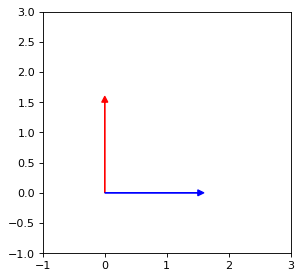

In [46]:
v1 = [0, 1.5]
v2 = [1.5, 0]

from matplotlib.pyplot import figure

figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')

plt.arrow(0,0, v1[0], v1[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, v2[0], v2[1], head_width = 0.1, head_length = 0.1, color = 'blue')

plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

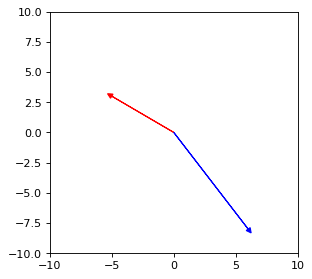

In [49]:
a = [-5, 3, 7]
b = [6, -8, 2]
# Do not look like orthoganal to me, but let's check

figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')

plt.arrow(0,0, a[0], a[1], head_width = 0.4, head_length = 0.4, color = 'red')
plt.arrow(0,0, b[0], b[1], head_width = 0.4, head_length = 0.4, color = 'blue')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()
# No, they are not

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([[2, - 15, 6, 20]])

In [51]:
c_T = c.T
c_T

array([[  2],
       [-15],
       [  6],
       [ 20]])

In [52]:
c_T*c
#Symmetric matrix where the first raw vector equals the first column vector, and their coordinates are 2 times as high as initial vectors

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

In [53]:
c*c
# The result of multip;ication is the main diagonal from presious example

array([[  4, 225,  36, 400]])

In [60]:
np.linalg.norm(c)**2


665.0

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## Vector d 

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

## Vector e 
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix}  - 8\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [57]:
# Using linalg function
f = np.array([[4, 12, 11, 9, 2]])
f_hat = f / np.linalg.norm(f)
f_hat

array([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])

In [58]:
# Just check with the formula
f_hat = f / (f**2).sum()**0.5
f_hat

array([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

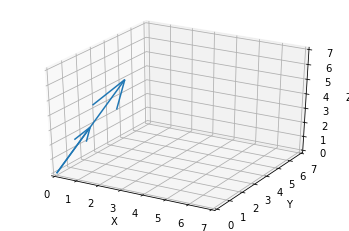

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Linear dependent vectors
n = [1, 1, 3]
m = [2, 2, 6]

vectors = np.array([[0,0,0,1,1,3], 
                    [0,0,0,2,2,6]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 7])
ax.set_ylim([0, 7])
ax.set_zlim([0, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

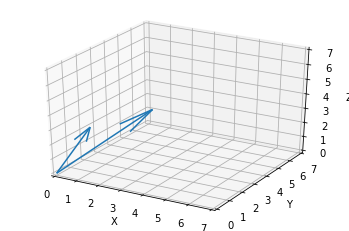

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Linear independent vectors
# they create an angle between them

n = [1, 1, 3]
m = [2, 4, 3]

vectors = np.array([[0,0,0,1,1,3], 
                    [0,0,0,2,4,3]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 7])
ax.set_ylim([0, 7])
ax.set_zlim([0, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [69]:
g = np.array([[1.2]])
h = np.array([[4.8]])

#I created a matrix from given vectors and counted its rank. 
# Expectedly, the span is one as long as g and h are linearly dependent
np.linalg.matrix_rank(np.row_stack((g,h)))

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
R = np.array([[1,-1,4],
              [2,0,8],
              [3,7,2]])

np.linalg.matrix_rank(R)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



[-0.4472136   0.89442719]
[0.9486833  0.31622777]


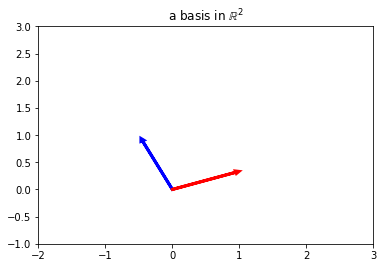

In [77]:
plt.xlim(-2,3)          
plt.ylim(-1,3)

# Original Vector
a = [-1, 2] 
b = [3, 1]

a_hat = a / np.linalg.norm(a)
b_hat = b / np.linalg.norm(b)

print(a_hat)
print(b_hat)

# Plot Vectors
plt.arrow(0,0, a_hat[0], a_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b_hat[0], b_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("a basis in $\mathbb{R}^2$")
plt.show()

## 6.2 What does it mean to form a basis?

In n-dimensional space, any vector can be represented as a linear combination of a set of vectors V={v1,v2,…,vm}

All the vectors in the set must be linear independent

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It tells us how many linear independent vectors form this matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [106]:
v = np.array([[1, 3]])
w = np.array([[-1, 2]])
numerator = np.vdot(w,v)
denominator = np.vdot(v,v)
fraction = numerator / denominator

new_position = fraction*v

new_position

array([[0.5, 1.5]])

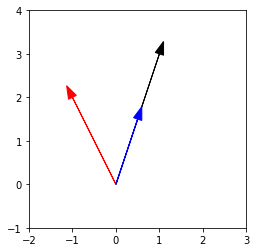

In [116]:
plt.xlim(-2,3)          
plt.ylim(-1,4)
axes = plt.gca()
axes.set_aspect('equal')

plt.arrow(0,0, 1, 3, head_width = 0.2, head_length = 0.3, color = 'black')
plt.arrow(0,0, -1, 2, head_width = 0.2, head_length = 0.3, color = 'red')
plt.arrow(0,0, new_position[0][0], new_position[0][1], head_width = 0.2, head_length = 0.3, color = 'blue')


plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

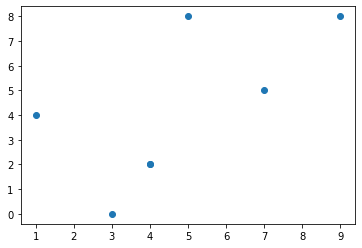

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()